In [1]:
import numpy
print('numpy: {}'.format(numpy.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))

numpy: 1.14.3
pandas: 0.23.0


In [2]:
!pwd

/Users/jakewendt/github/jakewendt/notebooks


In [3]:
file = "data/634370.snps.filtered.count.txt.with_nearests_OR.txt"

In [4]:
import glob
print(glob.glob(file))

['data/634370.snps.filtered.count.txt.with_nearests_OR.txt']


In [5]:
df = pandas.read_csv(file, delimiter="\t")

In [6]:
df.head()

,#chr,pos,5'tetranuc,3'tetranuc,trinuc,mut,trinuc_mut,strand,flank41bp,Ccount,TCcount,TCAcount,TCTcount,YTCAcount,RTCAcount,sample,nearest HERV,nearest HERV position,nearest HERV dist
0,chr1,13813,CCTT,CTTC,CTT,T>G,C[T>G]T,+,TGCCATTTGTCCTGCCCACCTTCTTAGAAGCGAGACGGAGC,23,6,3,3,0,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,881697
1,chr1,13838,ACCC,CCCA,CCC,C>T,C[C>T]C,+,AGAAGCGAGACGGAGCAGACCCATCTGCTACTGCCCTTTCT,23,7,5,5,0,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,881672
2,chr1,13868,CTAA,TAAA,TAA,A>G,T[A>G]A,+,CTGCCCTTTCTATAATAACTAAAGTTAGCTGCCCTGGACTA,17,2,1,1,0,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,881642
3,chr1,14610,AGTA,GTAG,GTA,T>C,G[T>C]A,+,GTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGCTTGTCCT,24,6,3,3,1,1,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,880900
4,chr1,14932,AAGG,AGGT,AGG,G>T,A[G>T]G,+,AAGGCAGGACAGAATTACAAGGTGCTGGCCCAGGGCGGGCA,25,2,1,1,0,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,880578



FYI. This distance is HERV position - Mutation position


In [7]:
df['nearest HERV dist'].head()

0    881697
1    881672
2    881642
3    880900
4    880578
Name: nearest HERV dist, dtype: int64

In [8]:
df['nearest HERV dist'][df['nearest HERV dist'] < 100000].head()

522    99142
523    97605
524    97459
525    97154
526    96892
Name: nearest HERV dist, dtype: int64

In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.rcParams["figure.figsize"] = [16.0,4.0]

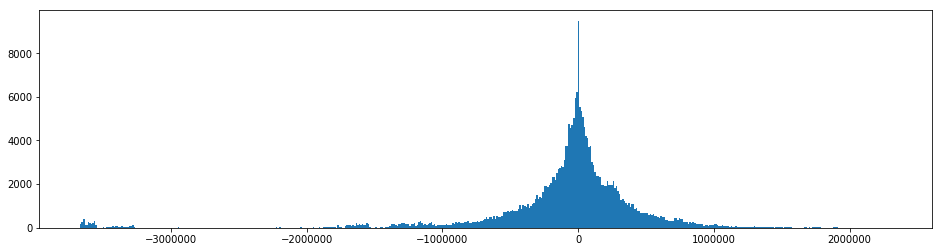

In [11]:
plt.hist(df['nearest HERV dist'], bins='auto')
plt.show()

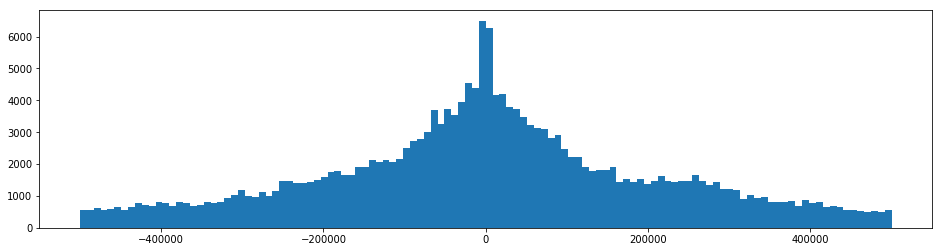

In [12]:
plt.hist(df[df['nearest HERV dist'].abs() < 500000]['nearest HERV dist'], bins='auto')
plt.show()

In [13]:
df[ (df['trinuc_mut'] == 'C[C>T]A' ) & ( df['nearest HERV dist'].abs() < 500000 )]

,#chr,pos,5'tetranuc,3'tetranuc,trinuc,mut,trinuc_mut,strand,flank41bp,Ccount,TCcount,TCAcount,TCTcount,YTCAcount,RTCAcount,sample,nearest HERV,nearest HERV position,nearest HERV dist
379,chr1,620181,CCCA,CCAC,CCA,C>T,C[C>T]A,+,TCACTTAAAATGCTGTGTCCCACCTCACTTTTCAGTGTCTC,18,6,4,4,2,0,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,275329
582,chr1,826352,GCCA,CCAT,CCA,C>T,C[C>T]A,+,TGGAAACTTTATGCCACAGCCATTAAATACAGAGATCATAC,15,4,2,2,0,1,NaN,"BEGIN_ERV_0000785,HERVK9-int",895510,69158
758,chr1,1089207,GCCA,CCAC,CCA,C>T,C[C>T]A,+,CCTGCGCCTGTGCATGGGGCCACCTCGGCCCTTGGACTTCA,28,3,1,1,1,0,NaN,"END_ERV_0216289,HERV16-int",906556,-182651
1471,chr1,2653081,ACCA,CCAA,CCA,C>T,C[C>T]A,+,CTGAACGCACGGAGCAGCACCAAAACCCCTAGGGGAGCATC,25,4,1,1,1,0,NaN,"END_ERV_0002181,HERVL-int",2626288,-26793
1498,chr1,2654125,CCCA,CCAC,CCA,C>T,C[C>T]A,+,TGACAACCTGGAGCAGCACCCACACCCCCAGGCGAGCATCT,26,4,2,2,0,1,NaN,"END_ERV_0002181,HERVL-int",2626288,-27837
1520,chr1,2655016,CCCA,CCAG,CCA,C>T,C[C>T]A,+,TGGAACAGCTCTCACAACCCCAGGTGAGCATCTGACAGCCC,24,6,4,4,2,1,NaN,"END_ERV_0002181,HERVL-int",2626288,-28728
1990,chr1,3342097,CCCA,CCAG,CCA,C>T,C[C>T]A,+,ATGAGGCAGCTAGGGAAACCCAGGGTGCACGATGGCCTCTG,25,4,2,2,1,0,NaN,"BEGIN_ERV_0002804,HERVK13-int",3801195,459098
2211,chr1,4090472,TCCA,CCAC,CCA,C>T,C[C>T]A,+,CAGAGGCAGCCGGGGGCCTCCACCAGTGGGTTCACAGCAGC,29,3,2,2,1,0,NaN,"BEGIN_ERV_0217769,HERVH-int,LTR7A,LTR7B",4178039,87567
2270,chr1,4336044,CCCA,CCAG,CCA,C>T,C[C>T]A,+,TGGCCTGAAGAGGCTGACCCCAGGGCATAATGCGTGGGCCT,26,3,3,3,1,1,NaN,"BEGIN_ERV_0003225,HERV16-int",4342524,6480
2553,chr1,5098165,CCCA,CCAC,CCA,C>T,C[C>T]A,+,CTGGAAATTGACCCATGACCCACCCACATTCCAGCTAGTGG,22,4,2,2,0,2,NaN,"BEGIN_ERV_0003900,HERVH-int,LTR7",5114487,16322


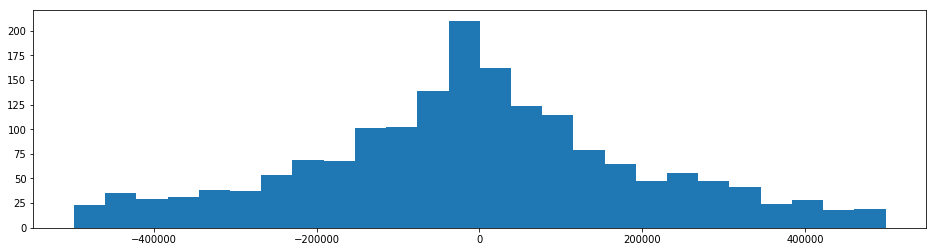

In [14]:
plt.hist(df[ (df['trinuc_mut'] == 'C[C>T]A' ) & ( df['nearest HERV dist'].abs() < 500000 )]['nearest HERV dist'], bins='auto')
plt.show()

In [15]:
df['nearest HERV dist'].median()

-6721.0

In [16]:
df['nearest HERV dist'].mean()

-88941.8638231787

In [17]:
df['nearest HERV dist'].std()

605386.0092526407

In [18]:
df['nearest HERV dist'].var()

366492220198.8383

In [19]:
df[df['trinuc_mut'] == 'C[T>G]T']['nearest HERV dist'].std()

620022.8396854223

In [20]:
df[df['trinuc_mut'] == 'C[C>T]A']['nearest HERV dist'].std()

580140.0994697225

In [21]:
df[df['mut'] == 'C>T']['nearest HERV dist'].std()

548622.4126748958

In [22]:
df[df['mut'] == 'C>A']['nearest HERV dist'].std()

632471.3508866399

In [23]:
df[df['mut'] == 'G>A']['nearest HERV dist'].std()

558734.5110642118

In [24]:
df[df['mut'] == 'C>G']['nearest HERV dist'].std()

857593.4208199744

In [25]:
df[df['mut'] == 'A>C']['nearest HERV dist'].std()

630865.9377570123

In [26]:
df['mut'].unique()

array(['T>G', 'C>T', 'A>G', 'T>C', 'G>T', 'C>G', 'G>A', 'T>A', 'G>C',
       'A>C', 'C>A', 'A>T'], dtype=object)

In [27]:
import sys
def printf(format, *args):
    sys.stdout.write(format % args)

In [28]:
numpy.sort(df['mut'].unique())

array(['A>C', 'A>G', 'A>T', 'C>A', 'C>G', 'C>T', 'G>A', 'G>C', 'G>T',
       'T>A', 'T>C', 'T>G'], dtype=object)

In [29]:
printf("%4s %8s %9s %12s %12s\n", "mut", "count", "mean", "median", "stdev")
for mut in numpy.sort(df['mut'].unique()):
    df_mut=df[df['mut'] == mut]
    df_mut_values=df_mut['nearest HERV dist']
    printf("%4s %8d %12.2f %12.2f %12.2f\n",mut,
           df_mut.size,
           df_mut_values.mean(),
           df_mut_values.median(),
           df_mut_values.std() )

 mut    count      mean       median        stdev
 A>C   239799   -111817.89     -9146.00    630865.94
 A>G   817095    -52058.29     -1773.00    530183.44
 A>T    92188   -335364.65    -31094.50    996057.08
 C>A   239628   -114217.84    -14506.00    632471.35
 C>G    94145   -240145.01    -27592.00    857593.42
 C>T   838508    -64583.35     -4878.00    548622.41
 G>A   829920    -68103.87     -4521.50    558734.51
 G>C    96881   -226763.66    -28450.00    813190.90
 G>T   241376   -118604.99    -14524.00    650789.35
 T>A    90117   -299309.28    -30911.00    954163.59
 T>C   822966    -60584.72     -3898.50    542311.51
 T>G   234194   -102726.76     -7830.50    650832.50


In [30]:
printf("%5s %10s %9s %12s %12s\n", "mut", "count", "mean", "median", "stdev")
for mut in numpy.sort(df['trinuc_mut'].unique()):
    df_mut=df[df['trinuc_mut'] == mut]
    df_mut_values=df_mut['nearest HERV dist']
    printf("%6s %8d %12.2f %12.2f %12.2f\n",mut,
           df_mut.size,
           df_mut_values.mean(),
           df_mut_values.median(),
           df_mut_values.std() )

  mut      count      mean       median        stdev
A[A>C]A    30970    -90654.19     -4859.50    608216.25
A[A>C]C    17366   -103873.77    -13096.50    554572.85
A[A>C]G    10507    -91294.14    -17005.00    613267.62
A[A>C]T    15124    -89485.70     -2345.00    644751.34
A[A>G]A    49248    -50098.66     -1311.50    510941.42
A[A>G]C    40261    -55133.27      -255.00    529077.25
A[A>G]G    46645    -53810.88     -3641.00    532604.21
A[A>G]T    68590    -45172.41     -2084.00    487076.22
A[A>T]A     9766   -250929.69    -31130.00    832083.24
A[A>T]C     4845   -343015.10    -24827.00   1056479.94
A[A>T]G     6156   -364086.53    -45887.50   1025195.28
A[A>T]T     7638   -376679.77    -17438.00   1085132.45
A[C>A]A    30210   -112859.96    -16796.00    569102.32
A[C>A]C    19893    -97136.98    -18611.00    540224.60
A[C>A]G    11077    -70655.82     -1041.00    566594.94
A[C>A]T    16530   -139781.48     -4376.50    716147.80
A[C>G]A    11324   -248846.09    -20000.00    85996

T[A>C]G     5624   -187120.10       504.50    844223.85
T[A>C]T    19000    -89200.81     -7250.00    567749.31
T[A>G]A    39387    -60060.55     -2028.00    561584.80
T[A>G]C    34447    -55765.00       334.00    554813.92
T[A>G]G    38798    -27136.01      1210.50    520155.73
T[A>G]T    88369    -26757.11        47.00    448741.34
T[A>T]A     5719   -167162.83      1659.00    699038.80
T[A>T]C     3572   -433118.79    -40423.50   1123911.13
T[A>T]G     3743   -393897.67    -56945.00   1046379.59
T[A>T]T     9234   -254981.04    -17696.00    896282.54
T[C>A]A    15941   -137978.49    -11027.00    740269.12
T[C>A]C    11856   -142581.59    -21020.00    680521.35
T[C>A]G     5377   -174526.25    -19644.00    769419.11
T[C>A]T    21660    -82292.12     -7709.00    572427.52
T[C>G]A    11324   -298183.50    -32534.50    942187.38
T[C>G]C     6270   -472481.91    -73147.50   1107426.07
T[C>G]G     3040   -355067.21     -8959.50   1095036.18
T[C>G]T    12730   -184956.64    -18124.00    83